<a href="https://colab.research.google.com/github/SeniraVinwath/breast-cancer-ml-analysis/blob/main/NoteBook1_20220997.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas library for data manipulation and analysis
import pandas as pd

# Numpy library for numerical operations
import numpy as np

# Matplotlib library for data visualization
import matplotlib.pyplot as plt

# Seaborn library for plotting
import seaborn as sns

# Interactive boxplot using Plotly for detailed visualization of Age outliers
import plotly.express as px

# MinMaxScaler for normalizing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Read the CSV file from Google Drive and load it into a DataFrame
data_frame = pd.read_csv('/content/drive/MyDrive/Machine Learning/Course Work/5DATA002W.2 Coursework Dataset(25012025v6.0).csv')

In [ ]:
# Display the first five rows to verify the dataset was loaded correctly
data_frame.head()

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


In [ ]:
# Print the number of rows and columns in the dataset
print("Dataset shape (rows, columns):", data_frame.shape)

Dataset shape (rows, columns): (4024, 18)


In [ ]:
# Print all column names in the dataset
print("Column names in the dataset:", data_frame.columns.tolist())

Column names in the dataset: ['Patient_ID', 'Month_of_Birth', 'Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


In [ ]:
# Displaying dataset information to check number of patients, column data types, and missing values
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

**Observations from data_frame.info**


1.   The dataset contains 4024 records, representing 4024 individual patients.
2.   Age is missing for 9 patients.
3.   Sex is missing for 4 patients.
4.   Occupation has significant missing data, with only 43 non null entries.
5.   Tumor_Size is missing in 3 cases.
6.   Regional_Node_Examined has 1 missing value.



In [ ]:
# Dropping the Occupation column since it has too many missing values
data_frame.drop('Occupation', axis=1, inplace=True)

# Displaying the first five rows to verify the column has been dropped
data_frame.head()

,Patient_ID,Month_of_Birth,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


In [ ]:
# Displaying summary statistics for numerical data to check if the values are correct
data_frame.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4024.000000,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,6.481362,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,3.475442,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,1.000000,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


**Observations from data_frame.describe**


1.   Some age values like -50 and 502 are clearly incorrect and need to be removed.
2.   A tumor size of -75 doesn’t make sense and should be reviewed.
3.   A survival time of 760 months is unusually high and needs to be checked.
4.   The value 61 for regional nodes examined may seem high, but since it's medical data, it can be left as is.



In [ ]:
# Display summary statistics for all colums that contain object data
# to check for unexpected categories or incorrect formatting
data_frame.describe(include='object')

,Patient_ID,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,A_Stage,Estrogen_Status,Progesterone_Status,Mortality_Status
count,4024,4020,4024,4024,4024,4024,4024,4024,4024,4024
unique,4024,2,4,3,5,4,2,2,2,7
top,A4035,Female,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive,Alive
freq,1,4001,1786,2732,1305,2351,3932,3755,3326,3399


**Observation from data_frame.describe(include='object')**


1.   The Mortality_Status column has 7 unique values instead of just "Dead" or "Alive" indicating incorrect entries that need to be cleaned.



In [ ]:
# Standardize 'Mortality_Status' values by converting all entries to lowercase
data_frame['Mortality_Status'] = data_frame['Mortality_Status'].str.lower()

# Check the number of unique values after standardization
print("Unique values in Mortality_Status (after cleaning):", data_frame['Mortality_Status'].unique())

Unique values in Mortality_Status (after cleaning): ['alive' 'dead']


In [ ]:
# Check the total number of missing values in each column
# to identify fields with significant missing data
data_frame.isnull().sum()

,0
Patient_ID,0
Month_of_Birth,0
Age,9
Sex,4
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0


**Observation on Missing Data**


*   Aside from the previously dropped 'Occupation' column, the dataset contains only minimal missing values across other fields.



In [ ]:
# Drop Patient_ID and Month_of_Birth columns as they are not useful for training
data_frame.drop(['Patient_ID', 'Month_of_Birth'], axis=1, inplace=True)

# Display the first few rows to confirm the columns were removed
data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,Female,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,alive
1,50.0,Female,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,alive
2,58.0,Female,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,alive
3,58.0,Female,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,alive
4,47.0,Female,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,alive


In [ ]:
# Drop rows where Sex column has null values
data_frame = data_frame.dropna(subset=['Sex'])

# Check the unique values in the Sex column after dropping the nulls
print("Unique values in Sex column:", data_frame['Sex'].unique())

Unique values in Sex column: ['Female' '1']


**Observation**


*   The 'Sex' column contains two unique values, 'Female' and '1'. The value 'Female' should be mapped to 0 for consistency.



In [ ]:
# Map '1' to 1 and 'Female' to 0 in the Sex column for consistency
data_frame['Sex'] = data_frame['Sex'].map({'1': 1, 'Female': 0})

# Display the first few rows to verify the changes
data_frame.head()

<ipython-input-313-36f2eb3c2c87>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,alive
1,50.0,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,alive
2,58.0,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,alive
3,58.0,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,alive
4,47.0,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,alive


In [ ]:
# Check the unique values in the T_Stage column
print("Unique values in T_Stage column:", data_frame['T_Stage'].unique())

Unique values in T_Stage column: ['T1' 'T2' 'T3' 'T4']


In [ ]:
# Map T_Stage values to corresponding numerical values
data_frame['T_Stage'] = data_frame['T_Stage'].map({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4})

# Check the unique values in the T_Stage column after mapping
print("Unique values in T_Stage column after mapping:", data_frame['T_Stage'].unique())

Unique values in T_Stage column after mapping: [1 2 3 4]


<ipython-input-315-9192095b1095>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Check the unique values in the N_Stage column
print("Unique values in N_Stage column:", data_frame['N_Stage'].unique())

Unique values in N_Stage column: ['N1' 'N2' 'N3']


In [ ]:
# Map N_Stage values to corresponding numerical values
data_frame['N_Stage'] = data_frame['N_Stage'].map({'N1': 1, 'N2': 2, 'N3': 3})

# Check the unique values in the N_Stage column after mapping
print("Unique values in N_Stage column after mapping:", data_frame['N_Stage'].unique())

Unique values in N_Stage column after mapping: [1 2 3]


<ipython-input-317-216e5e50e994>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Check the unique values in the 6th_Stage column
print("Unique values in 6th_Stage column:", data_frame['6th_Stage'].unique())

Unique values in 6th_Stage column: ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']


In [ ]:
# Map 6th_Stage values to corresponding numerical values
# IIA = 1
# IIB = 2
# IIIA = 3
# IIIB = 4
# IIIC = 5
data_frame['6th_Stage'] = data_frame['6th_Stage'].map({'IIA': 1, 'IIB': 2, 'IIIA': 3, 'IIIB': 4, 'IIIC': 5})

# Check the unique values in the 6th_Stage column after mapping
print("Unique values in 6th_Stage column after mapping:", data_frame['6th_Stage'].unique())

Unique values in 6th_Stage column after mapping: [1 3 5 2 4]


In [ ]:
# Check the unique values in the Differentiated column
print("Unique values in Differentiated column:", data_frame['Differentiated'].unique())

Unique values in Differentiated column: ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']


In [ ]:
# Map Differentiated values to corresponding numerical values
# Well differentiated = 1
# Moderately differentiated = 2
# Poorly differentiated = 3
# Undifferentiated = 4

data_frame['Differentiated'] = data_frame['Differentiated'].map({'Well differentiated': 1, 'Moderately differentiated': 2, 'Poorly differentiated': 3, 'Undifferentiated': 4})

# Check the unique values in the Differentiated column after mapping
print("Unique values in Differentiated column after mapping:", data_frame['Differentiated'].unique())

Unique values in Differentiated column after mapping: [3 2 1 4]


In [ ]:
# Check the unique values in the Grade column
print("Unique values in Grade column:", data_frame['Grade'].unique())

Unique values in Grade column: [3 2 1 4]


In [ ]:
# Check the unique values in the A_Stage column
print("Unique values in A_Stage column:", data_frame['A_Stage'].unique())

Unique values in A_Stage column: ['Regional' 'Distant']


In [ ]:
# Map A_Stage values to corresponding numerical values
# Regional = 1
# Distant = 2

data_frame['A_Stage'] = data_frame['A_Stage'].map({'Regional': 1, 'Distant': 2})

# Check the unique values in the A_Stage column after mapping
print("Unique values in A_Stage column after mapping:", data_frame['A_Stage'].unique())

Unique values in A_Stage column after mapping: [1 2]


In [ ]:
# Check the unique values in the Estrogen_Status column
print("Unique values in Estrogen_Status column:", data_frame['Estrogen_Status'].unique())

Unique values in Estrogen_Status column: ['Positive' 'Negative']


In [ ]:
# Map Estrogen_Status values to corresponding numerical values
# Positive = 1
# Negative = 0

data_frame['Estrogen_Status'] = data_frame['Estrogen_Status'].map({'Positive': 1, 'Negative': 0})

# Check the unique values in the Estrogen_Status column after mapping
print("Unique values in Estrogen_Status column after mapping:", data_frame['Estrogen_Status'].unique())

Unique values in Estrogen_Status column after mapping: [1 0]


In [ ]:
# Check the unique values in the Mortality_Status column
print("Unique values in Mortality_Status column:", data_frame['Mortality_Status'].unique())

Unique values in Mortality_Status column: ['alive' 'dead']


In [ ]:
# Map Mortality_Status values to corresponding numerical values
# alive = 1
# dead = 0

data_frame['Mortality_Status'] = data_frame['Mortality_Status'].map({'alive': 1, 'dead': 0})

# Check the unique values in the Mortality_Status column after mapping
print("Unique values in Mortality_Status column after mapping:", data_frame['Mortality_Status'].unique())

Unique values in Mortality_Status column after mapping: [1 0]


In [ ]:
# Check the unique values in the Progesterone_Status column
print("Unique values in Progesterone_Status column:", data_frame['Progesterone_Status'].unique())

Unique values in Progesterone_Status column: ['Positive' 'Negative']


In [ ]:
# Map Progesterone_Status values to corresponding numerical values
# Positive = 1
# Negative = 0

data_frame['Progesterone_Status'] = data_frame['Progesterone_Status'].map({'Positive': 1, 'Negative': 0})

# Check the unique values in the Progesterone_Status column after mapping
print("Unique values in Progesterone_Status column after mapping:", data_frame['Progesterone_Status'].unique())

Unique values in Progesterone_Status column after mapping: [1 0]


In [ ]:
# Fix the column name typo from 'Reginol_Node_Positive' to 'Regional_Node_Positive'
data_frame.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

# Print the head of the DataFrame to confirm the column was renamed
data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,1,1,1,3,3,1,4.0,1,1,24.0,1,60,1
1,50.0,0,2,2,3,2,2,1,35.0,1,1,14.0,5,62,1
2,58.0,0,3,3,5,2,2,1,63.0,1,1,14.0,7,75,1
3,58.0,0,1,1,1,3,3,1,18.0,1,1,2.0,1,84,1
4,47.0,0,2,1,2,3,3,1,41.0,1,1,3.0,1,50,1


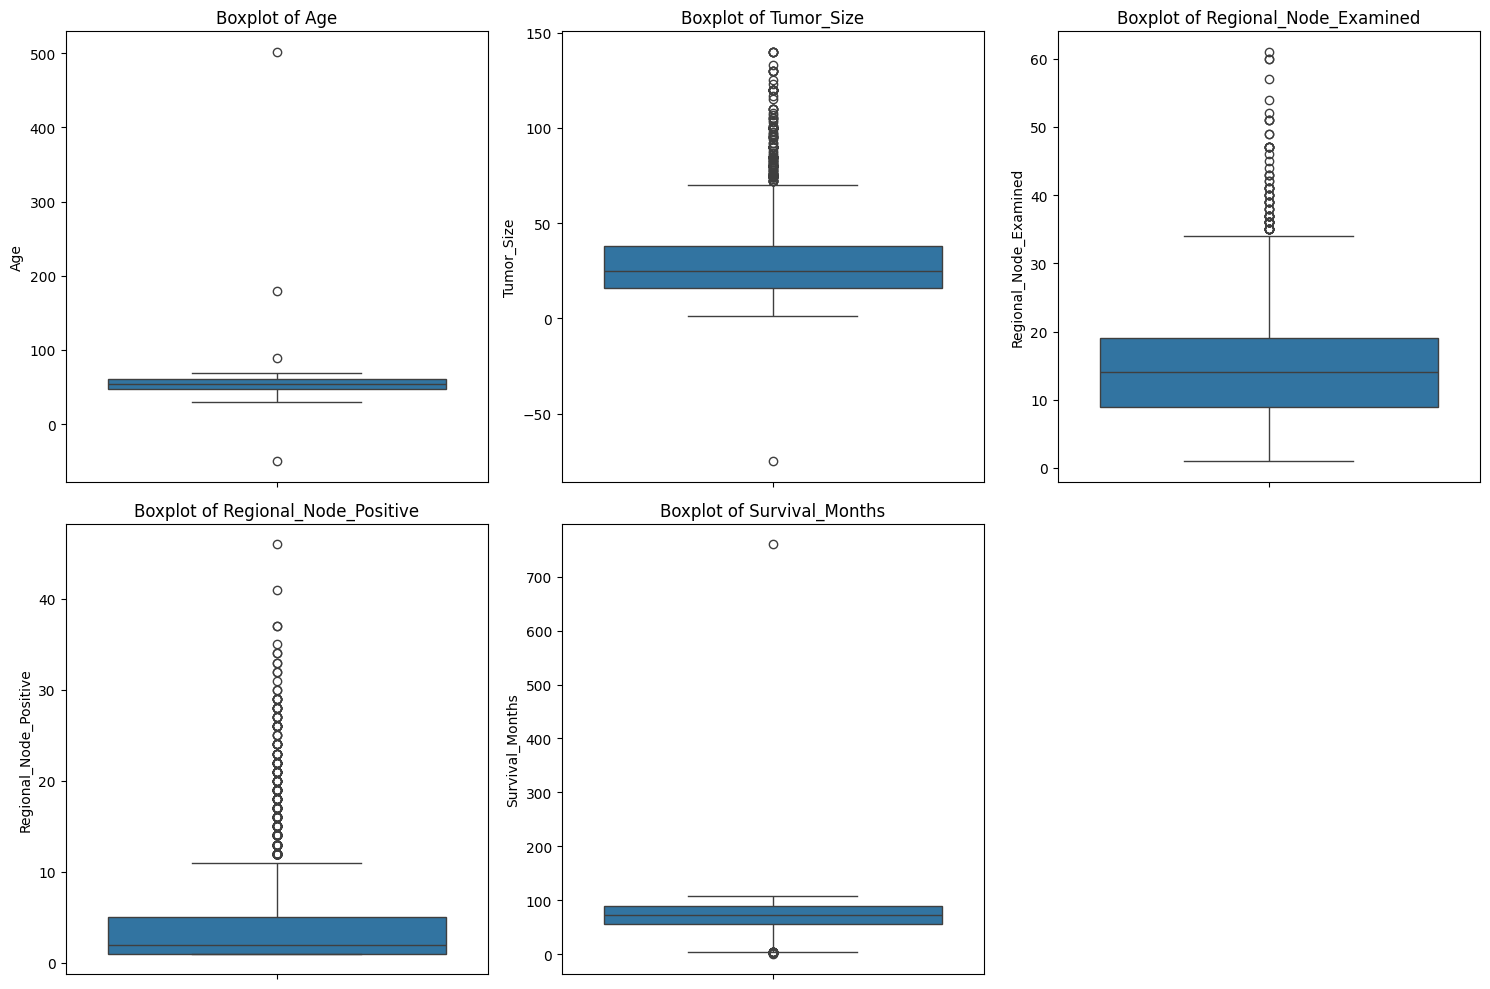

In [ ]:
# Create a list of numerical columns to check for outliers
numerical_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot boxplots for all numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_frame, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Outlier Observations from Boxplots**


1.   Age – extreme low and high values
2.   Tumor_Size – high values beyond the upper whisker
3.   Regional_Node_Examined – several high-end outliers
4.   Regional_Node_Positive – extreme values upward
5.   Survival_Months – unusually large outlier near 750



In [ ]:
# Display transposed statistical summary to help identify outliers and extreme values
data_frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4011.0,54.113937,11.719253,-50.0,47.0,54.0,61.0,502.0
Sex,4020.0,0.004726,0.068594,0.0,0.0,0.0,0.0,1.0
T_Stage,4020.0,1.784080,0.765091,1.0,1.0,2.0,2.0,4.0
N_Stage,4020.0,1.438308,0.693642,1.0,1.0,1.0,2.0,3.0
6th_Stage,4020.0,2.321642,1.266947,1.0,1.0,2.0,3.0,5.0
Differentiated,4020.0,2.151493,0.637772,1.0,2.0,2.0,3.0,4.0
Grade,4020.0,2.151493,0.637772,1.0,2.0,2.0,3.0,4.0
A_Stage,4020.0,1.022886,0.149557,1.0,1.0,1.0,1.0,2.0
Tumor_Size,4017.0,30.400797,21.152152,-75.0,16.0,25.0,38.0,140.0
Estrogen_Status,4020.0,0.933085,0.249907,0.0,1.0,1.0,1.0,1.0


**Observation**


*   Although general outlier detection was performed using Seaborn boxplots, the Age column includes a value between 80–100, which are potentially valid but flagged as outliers. To inspect these values more closely, an interactive Plotly boxplot is used.



In [ ]:
# Interactive boxplot using Plotly for detailed visualization of Age outliers
import plotly.express as px

age_boxplot_fig = px.box(data_frame, x="Age", title="Interactive Boxplot of Age")
age_boxplot_fig.show()

**Observation**


*   To verify if the outlier age value of 89 is associated with valid data across other columns, the specific record is extracted and reviewed.



In [ ]:
# Filter and inspect records where Age is 89 to verify legitimacy
Age_89 = data_frame[data_frame['Age'] == 89]
Age_89

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
842,89.0,0,2,1,2,1,1,1,21.0,1,1,14.0,1,90,1


**Observation**


*   The record with the outlier age value of 89 appears valid across all other fields, indicating it's a legitimate entry and should be retained in the dataset.



In [ ]:
# Define the IQR-based outlier detection function
def find_outliers_IQR(df_column):
    q1 = df_column.quantile(0.25)
    q3 = df_column.quantile(0.75)
    IQR = q3 - q1
    outliers = df_column[(df_column < (q1 - 1.5 * IQR)) | (df_column > (q3 + 1.5 * IQR))]
    return outliers

# Find outliers in the 'Age' column
age_outliers = find_outliers_IQR(data_frame['Age'])

# Print outliers and their indexes properly
print("Outliers in 'Age' column:\n", age_outliers)
print("\nIndexes of Age outliers:\n", age_outliers.index.tolist())

Outliers in 'Age' column:
 142    180.0
212    -50.0
522    502.0
842     89.0
Name: Age, dtype: float64

Indexes of Age outliers:
 [142, 212, 522, 842]


In [ ]:
# List of outlier indexes to remove (excluding index 842 which has Age = 89)
outlier_indexes_to_remove = [142, 212, 522]

# Drop those outliers from the DataFrame
data_frame = data_frame.drop(index=outlier_indexes_to_remove)

# Display the updated DataFrame shape to confirm removal
print(f"Updated DataFrame shape: {data_frame.shape}")

Updated DataFrame shape: (4017, 15)


In [ ]:
# Checking the information of the DataFrame to identify missing Age values
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4008 non-null   float64
 1   Sex                     4017 non-null   int64  
 2   T_Stage                 4017 non-null   int64  
 3   N_Stage                 4017 non-null   int64  
 4   6th_Stage               4017 non-null   int64  
 5   Differentiated          4017 non-null   int64  
 6   Grade                   4017 non-null   int64  
 7   A_Stage                 4017 non-null   int64  
 8   Tumor_Size              4014 non-null   float64
 9   Estrogen_Status         4017 non-null   int64  
 10  Progesterone_Status     4017 non-null   int64  
 11  Regional_Node_Examined  4016 non-null   float64
 12  Regional_Node_Positive  4017 non-null   int64  
 13  Survival_Months         4017 non-null   int64  
 14  Mortality_Status        4017 non-null   int64

In [ ]:
# Impute missing 'Age' values with the median
age_median = data_frame['Age'].median()
data_frame['Age'].fillna(age_median, inplace=True)

# Checking the information of the DataFrame again to verify the imputation
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4017 non-null   float64
 1   Sex                     4017 non-null   int64  
 2   T_Stage                 4017 non-null   int64  
 3   N_Stage                 4017 non-null   int64  
 4   6th_Stage               4017 non-null   int64  
 5   Differentiated          4017 non-null   int64  
 6   Grade                   4017 non-null   int64  
 7   A_Stage                 4017 non-null   int64  
 8   Tumor_Size              4014 non-null   float64
 9   Estrogen_Status         4017 non-null   int64  
 10  Progesterone_Status     4017 non-null   int64  
 11  Regional_Node_Examined  4016 non-null   float64
 12  Regional_Node_Positive  4017 non-null   int64  
 13  Survival_Months         4017 non-null   int64  
 14  Mortality_Status        4017 non-null   int64

<ipython-input-339-9a4510e46464>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# Check for null values in 'Tumor_Size' column
tumor_size_null_count = data_frame['Tumor_Size'].isnull().sum()
print(f"Number of null values in 'Tumor_Size': {tumor_size_null_count}")

Number of null values in 'Tumor_Size': 3


**Observation**


*   After checking the null count in the Tumor_Size column, found that there are only 3 missing values. Since these are a small proportion of the data, decided to drop these rows rather than imputing medical values.



In [ ]:
# Drop rows with null values in 'Tumor_Size' column
data_frame.dropna(subset=['Tumor_Size'], inplace=True)

# Check the shape of the DataFrame after dropping the rows
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4014 non-null   float64
 1   Sex                     4014 non-null   int64  
 2   T_Stage                 4014 non-null   int64  
 3   N_Stage                 4014 non-null   int64  
 4   6th_Stage               4014 non-null   int64  
 5   Differentiated          4014 non-null   int64  
 6   Grade                   4014 non-null   int64  
 7   A_Stage                 4014 non-null   int64  
 8   Tumor_Size              4014 non-null   float64
 9   Estrogen_Status         4014 non-null   int64  
 10  Progesterone_Status     4014 non-null   int64  
 11  Regional_Node_Examined  4013 non-null   float64
 12  Regional_Node_Positive  4014 non-null   int64  
 13  Survival_Months         4014 non-null   int64  
 14  Mortality_Status        4014 non-null   int64

In [ ]:
# Find outliers in the 'Tumor_Size' column using IQR
tumor_size_outliers = find_outliers_IQR(data_frame['Tumor_Size'])

# Print the outliers and their indexes
print("Outliers in 'Tumor_Size' column:\n")
print(tumor_size_outliers)
print("\nIndexes of Tumor_Size outliers:\n")
print(tumor_size_outliers.index.tolist())

Outliers in 'Tumor_Size' column:

8       103.0
52      120.0
53       77.0
63       75.0
70      130.0
        ...  
3930    120.0
3965    140.0
3991     90.0
4009    100.0
4012     80.0
Name: Tumor_Size, Length: 221, dtype: float64

Indexes of Tumor_Size outliers:

[8, 52, 53, 63, 70, 86, 87, 116, 147, 155, 184, 194, 210, 215, 219, 220, 238, 254, 276, 277, 289, 305, 316, 318, 322, 337, 362, 367, 371, 376, 379, 401, 426, 441, 447, 476, 480, 483, 525, 526, 540, 564, 585, 593, 602, 630, 691, 705, 713, 740, 769, 828, 874, 877, 889, 893, 894, 897, 906, 909, 922, 937, 938, 971, 985, 1007, 1095, 1122, 1159, 1161, 1193, 1196, 1225, 1272, 1289, 1316, 1321, 1346, 1355, 1369, 1375, 1396, 1462, 1473, 1479, 1512, 1522, 1531, 1540, 1623, 1668, 1682, 1685, 1716, 1739, 1785, 1799, 1812, 1870, 1879, 1881, 1887, 1915, 1955, 1992, 2007, 2028, 2038, 2039, 2045, 2055, 2058, 2068, 2085, 2094, 2107, 2137, 2147, 2157, 2165, 2176, 2218, 2223, 2226, 2228, 2240, 2249, 2265, 2273, 2278, 2283, 2300, 2304, 2339, 

**Observation**


*   As the accepted range for tumor size is 0-150. This indicates the need to investigate and clean any erroneous values falling outside this range to ensure data accuracy.



In [ ]:
# Check how many Tumor_Size values are less than 0
invalid_tumor_size = data_frame[data_frame['Tumor_Size'] < 0]

# Print the number of records with invalid Tumor_Size values
print(f"Number of Tumor_Size values less than 0: {invalid_tumor_size.shape[0]}")

Number of Tumor_Size values less than 0: 1


In [ ]:
# Drop the record with a Tumor_Size less than 0
data_frame = data_frame[data_frame['Tumor_Size'] >= 0]

# Check to confirm it's dropped
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4013 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4013 non-null   float64
 1   Sex                     4013 non-null   int64  
 2   T_Stage                 4013 non-null   int64  
 3   N_Stage                 4013 non-null   int64  
 4   6th_Stage               4013 non-null   int64  
 5   Differentiated          4013 non-null   int64  
 6   Grade                   4013 non-null   int64  
 7   A_Stage                 4013 non-null   int64  
 8   Tumor_Size              4013 non-null   float64
 9   Estrogen_Status         4013 non-null   int64  
 10  Progesterone_Status     4013 non-null   int64  
 11  Regional_Node_Examined  4012 non-null   float64
 12  Regional_Node_Positive  4013 non-null   int64  
 13  Survival_Months         4013 non-null   int64  
 14  Mortality_Status        4013 non-null   int64

**Observation**


*   One record with a tumor size less than 0 was found and dropped, as this is outside the valid range of 0-150.



In [ ]:
# Check for null values in 'Regional_Node_Examined' column
Regional_Node_Examined_null_count = data_frame['Regional_Node_Examined'].isnull().sum()
print(f"Number of null values in 'Regional_Node_Examined': {Regional_Node_Examined_null_count}")

Number of null values in 'Regional_Node_Examined': 1


**Observation**


*   One record with a missing value in the Regional_Node_Examined column was found. Since it's the only record with missing data in this column, it was decided to drop it rather than imputing medical values



In [ ]:
# Drop the record with missing Regional_Node_Examined value
data_frame = data_frame.dropna(subset=['Regional_Node_Examined'])

# Check to confirm it's dropped
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4012 non-null   float64
 1   Sex                     4012 non-null   int64  
 2   T_Stage                 4012 non-null   int64  
 3   N_Stage                 4012 non-null   int64  
 4   6th_Stage               4012 non-null   int64  
 5   Differentiated          4012 non-null   int64  
 6   Grade                   4012 non-null   int64  
 7   A_Stage                 4012 non-null   int64  
 8   Tumor_Size              4012 non-null   float64
 9   Estrogen_Status         4012 non-null   int64  
 10  Progesterone_Status     4012 non-null   int64  
 11  Regional_Node_Examined  4012 non-null   float64
 12  Regional_Node_Positive  4012 non-null   int64  
 13  Survival_Months         4012 non-null   int64  
 14  Mortality_Status        4012 non-null   int64

**Observation**


*   No negative outliers were observed in the Seaborn box plots for the Regional_Node_Examined and Regional_Node_Positive columns. Since these features represent sensitive and variable medical data, the identified outliers were retained without removal or modification, as they may reflect genuine clinical variations.



**Observation**


*   An unusual outlier was identified in the Survival_Months column through the Seaborn box plot, showing a value exceeding 700 months. Proceeding to remove this record to maintain data integrity.


In [ ]:
# Remove records where Survival_Months > 200
data_frame = data_frame[data_frame['Survival_Months'] <= 200]

# Check updated DataFrame info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4011 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4011 non-null   float64
 1   Sex                     4011 non-null   int64  
 2   T_Stage                 4011 non-null   int64  
 3   N_Stage                 4011 non-null   int64  
 4   6th_Stage               4011 non-null   int64  
 5   Differentiated          4011 non-null   int64  
 6   Grade                   4011 non-null   int64  
 7   A_Stage                 4011 non-null   int64  
 8   Tumor_Size              4011 non-null   float64
 9   Estrogen_Status         4011 non-null   int64  
 10  Progesterone_Status     4011 non-null   int64  
 11  Regional_Node_Examined  4011 non-null   float64
 12  Regional_Node_Positive  4011 non-null   int64  
 13  Survival_Months         4011 non-null   int64  
 14  Mortality_Status        4011 non-null   int64

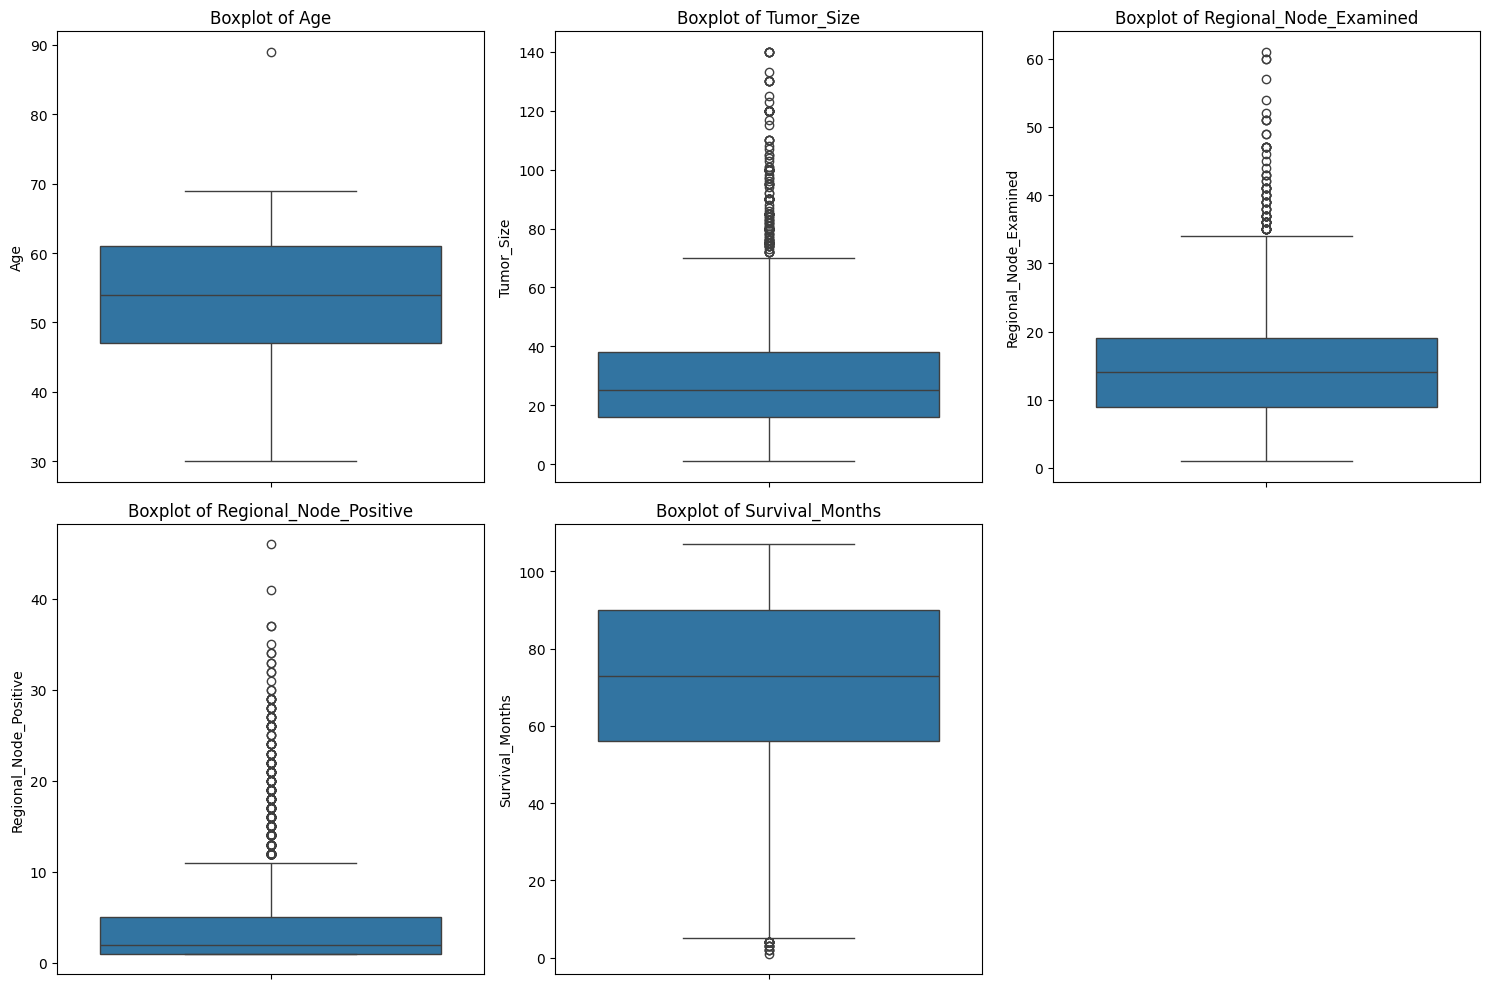

In [ ]:
# Create a list of numerical columns to re-check for outliers
numerical_cols = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot boxplots for all numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_frame, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned dataset to a CSV file
data_frame.to_csv('cleaned_breast_cancer_data.csv', index=False)

In [ ]:
# Load the cleaned breast cancer dataset from the saved CSV file
new_data_frame = pd.read_csv('/content/cleaned_breast_cancer_data.csv')

# Display the first few rows of the dataset to verify successful loading
new_data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,1,1,1,3,3,1,4.0,1,1,24.0,1,60,1
1,50.0,0,2,2,3,2,2,1,35.0,1,1,14.0,5,62,1
2,58.0,0,3,3,5,2,2,1,63.0,1,1,14.0,7,75,1
3,58.0,0,1,1,1,3,3,1,18.0,1,1,2.0,1,84,1
4,47.0,0,2,1,2,3,3,1,41.0,1,1,3.0,1,50,1


In [ ]:
# Define the columns that need to be scaled
numerical_columns = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns
new_data_frame[numerical_columns] = scaler.fit_transform(new_data_frame[numerical_columns])

# Now the data is scaled and ready for saving
# Display the first few rows of the dataset to verify successful scaling
new_data_frame.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,0.644068,0,1,1,1,3,3,1,0.021583,1,1,0.383333,0.000000,0.556604,1
1,0.338983,0,2,2,3,2,2,1,0.244604,1,1,0.216667,0.088889,0.575472,1
2,0.474576,0,3,3,5,2,2,1,0.446043,1,1,0.216667,0.133333,0.698113,1
3,0.474576,0,1,1,1,3,3,1,0.122302,1,1,0.016667,0.000000,0.783019,1
4,0.288136,0,2,1,2,3,3,1,0.287770,1,1,0.033333,0.000000,0.462264,1


In [ ]:
# Create a copy of the original data frame
classification_df = new_data_frame.copy()

In [ ]:
# Checking the original class distribution in the classification dataset
print("\nOriginal Class Distribution in Classification Dataset:")
print(classification_df['Mortality_Status'].value_counts())


Original Class Distribution in Classification Dataset:
Mortality_Status
1    3396
0     615
Name: count, dtype: int64


**Observation**


*   The original class distribution for the Mortality_Status column is displayed, showing the counts of records in each class. This helps us understand the balance between the classes



**Observation**


*   The dataset has an imbalanced class distribution with 3396 instances of Mortality_Status 1 (majority) and 615 instances of Mortality_Status 0 (minority). Will separate the majority and minority classes and proceed to balance them.



In [ ]:
# Separating majority and minority classes
minority_class = classification_df[classification_df['Mortality_Status'] == 0]  # Dead class (minority)
majority_class = classification_df[classification_df['Mortality_Status'] == 1]  # Alive class (majority)

In [ ]:
# Getting the number of minority class samples
minority_count = len(minority_class)  # Count the number of records in the minority class (Dead)

In [ ]:
# Randomly sampling the majority class to match the minority class
majority_sampled = majority_class.sample(n=minority_count, random_state=42)  # Match the number of minority class samples

# Combining the sampled majority class with the minority class
balanced_classification_df = pd.concat([majority_sampled, minority_class])  # Concatenate minority class and sampled majority class

# Shuffling the balanced dataset
balanced_classification_df = balanced_classification_df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset and reset index

**Observation**


*   The majority class (Alive) was randomly downsampled to match the number of records in the minority class (Dead). After combining both classes, the dataset was shuffled to ensure random distribution, preparing the data for further processing and model training.



In [ ]:
# Checking the new distribution
print("\nBalanced Class Distribution in Classification Dataset:")  # Print message for balanced distribution check
print(balanced_classification_df['Mortality_Status'].value_counts())  # Display the value counts of each class in the balanced dataset


Balanced Class Distribution in Classification Dataset:
Mortality_Status
1    615
0    615
Name: count, dtype: int64


In [ ]:
# Drop the 'Survival_Months' column as it's not needed for classification
classification_df = balanced_classification_df.drop(columns=['Survival_Months'])

In [ ]:
# Display concise summary of the classification DataFrame to check data types and missing values
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1230 non-null   float64
 1   Sex                     1230 non-null   int64  
 2   T_Stage                 1230 non-null   int64  
 3   N_Stage                 1230 non-null   int64  
 4   6th_Stage               1230 non-null   int64  
 5   Differentiated          1230 non-null   int64  
 6   Grade                   1230 non-null   int64  
 7   A_Stage                 1230 non-null   int64  
 8   Tumor_Size              1230 non-null   float64
 9   Estrogen_Status         1230 non-null   int64  
 10  Progesterone_Status     1230 non-null   int64  
 11  Regional_Node_Examined  1230 non-null   float64
 12  Regional_Node_Positive  1230 non-null   float64
 13  Mortality_Status        1230 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 1

In [ ]:
# Display the first few rows of the classification DataFrame
classification_df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Mortality_Status
0,0.288136,0,3,2,3,1,1,1,0.949640,1,1,0.416667,0.066667,1
1,0.644068,0,1,3,5,3,3,1,0.136691,1,0,0.150000,0.200000,0
2,0.254237,0,1,1,1,2,2,1,0.136691,1,1,0.416667,0.022222,1
3,0.186441,0,2,2,3,2,2,1,0.244604,1,1,0.366667,0.066667,1
4,0.474576,0,2,1,2,3,3,1,0.338129,1,1,0.183333,0.022222,0


In [ ]:
# Save the classification DataFrame to a CSV file
classification_df.to_csv('/content/classification_data.csv', index=False)

In [ ]:
# Create a new DataFrame for regression by filtering only the rows where Mortality_Status is 0 (Dead)
# Then drop the 'Mortality_Status' column since it's not needed for regression tasks
regression_df = new_data_frame[new_data_frame['Mortality_Status'] == 0].drop(columns=['Mortality_Status'])

# Show a concise summary of the regression DataFrame to confirm structure and absence of missing values
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 7 to 4004
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     615 non-null    float64
 1   Sex                     615 non-null    int64  
 2   T_Stage                 615 non-null    int64  
 3   N_Stage                 615 non-null    int64  
 4   6th_Stage               615 non-null    int64  
 5   Differentiated          615 non-null    int64  
 6   Grade                   615 non-null    int64  
 7   A_Stage                 615 non-null    int64  
 8   Tumor_Size              615 non-null    float64
 9   Estrogen_Status         615 non-null    int64  
 10  Progesterone_Status     615 non-null    int64  
 11  Regional_Node_Examined  615 non-null    float64
 12  Regional_Node_Positive  615 non-null    float64
 13  Survival_Months         615 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 72.1 KB


In [ ]:
# Display the first few records of the regression DataFrame
regression_df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months
7,0.169492,0,2,1,2,2,2,1,0.208633,1,1,0.133333,0.000000,0.122642
10,0.644068,0,1,1,1,2,2,1,0.086331,1,1,0.133333,0.000000,0.594340
40,0.457627,0,3,3,5,2,2,1,0.496403,1,1,0.183333,0.244444,0.386792
46,0.203390,0,1,3,5,2,2,1,0.057554,0,0,0.233333,0.022222,0.358491
64,0.627119,0,1,1,1,2,2,1,0.086331,1,1,0.250000,0.044444,0.556604


In [ ]:
# Save the regression DataFrame to a CSV file
regression_df.to_csv('/content/regression_data.csv', index=False)